### Scraping song lyrics using Genius API

Import necessary packages

In [103]:
import json
import requests
import pandas as pd
from scrapy import Selector
from pprint import pprint

Open JSON file containing credentials

In [104]:
credentials_file_path = "./credentials.json"

with open(credentials_file_path, "r") as f:
    credentials = json.load(f)

Initialise a new session

In [105]:
session = requests.Session()

I created a custom function `generate_song_url` to generate the Genius page URL for a song using the title and artist of the song. 

In [106]:
def generate_song_url(song_artist, song_title):
    '''
    Returns a string of the URL for the Genius page of the song

        Parameters:
            song_artist (str): The artist of the song
            song_title (str): The title of the song

        Returns:
            song_url (str): The URL for the Genius page of the song
    '''
    base_url = 'https://genius.com/'
    
    formatted_artist = song_artist.lower().replace(' ', '-')
    formatted_title = song_title.lower().replace(' ', '-')
    
    song_url = f'{base_url}{formatted_artist}-{formatted_title}-lyrics'

    return song_url

I created a custom function `scrape_lyrics` to scrape song lyrics from the Genius page for any given song. 

Note that the lyrics returned are formatted such that each line of lyric appears in a new line, similar to how it is displayed on the Genius page.

In [107]:
def scrape_lyrics(song_url):
    '''
    Returns a string of song lyrics, with each line separated by a new line

        Parameters:
            song_url (str): The URL of the Genius page for the song

        Returns:
            lyrics (str): The lyrics of the song
    '''
    response = session.get(song_url)
    sel = Selector(text=response.text)
    lyrics = '\n'.join(sel.css('div.Lyrics__Container-sc-1ynbvzw-1.kUgSbL ::text').getall())

    return lyrics

At this point of data collection, we will have a pandas dataframe of already selected and filtered songs from using the YouTube API. Critically, the dataframe will have information on the name and artist of each song.

We now want to add the lyrics of each song into the dataframe.

In [108]:
# I used a random csv file I made from artists online to do experiment

all_songs_df = pd.read_csv('excel_songs.csv')

songs_test = all_songs_df

In [109]:
# create placeholder dataframe for testing
songs_data = {
    'Title': ['Lose Yourself', 'Bones', 'Love Story'],
    'Artist': ['Eminem', 'Imagine Dragons', 'Taylor Swift']
}

songs_df = pd.DataFrame(songs_data)

songs_df


,Title,Artist
0,Lose Yourself,Eminem
1,Bones,Imagine Dragons
2,Love Story,Taylor Swift


In [110]:
# add Genius URL of each song to dataframe
songs_test['Genius_URL'] = songs_test.apply(lambda row: generate_song_url(row['Artist'], row['Song']), axis=1)

In [111]:
# add Genius lyrics of each song to dataframe
songs_test['Genius_lyrics'] = songs_test.apply(lambda row: scrape_lyrics(row['Genius_URL']), axis=1)

In [112]:
songs_test

,Artist,Song,Genius_URL,Genius_lyrics
0,The Weeknd,Blinding Lights,https://genius.com/the-weeknd-blinding-lights-...,[Intro]\nYeah\n[Verse 1]\nI've been tryna call...
1,Glass Animals,Heat Waves,https://genius.com/glass-animals-heat-waves-ly...,"[Intro]\n(Last night, all I think about is you..."
2,Harry Styles,As It Was,https://genius.com/harry-styles-as-it-was-lyrics,"[Intro]\nCome on, Harry, we wanna say goodnigh..."
3,The Kid LAROI & Justin Bieber,Stay,https://genius.com/the-kid-laroi-&-justin-bieb...,
4,The Weeknd & Ariana Grande,Save Your Tears,https://genius.com/the-weeknd-&-ariana-grande-...,
...,...,...,...,...
195,Katy Perry,I Kissed A Girl,https://genius.com/katy-perry-i-kissed-a-girl-...,[Verse 1]\nThis was never the way I planned\nN...
196,Terror Squad,Lean Back,https://genius.com/terror-squad-lean-back-lyrics,"[Intro: Fat Joe]\nOwwwwww! Yeah! My niggas, ah..."
197,Chingy,Right Thurr,https://genius.com/chingy-right-thurr-lyrics,"[Intro]\nUh\nHey, Dirty (\nWhat?\n)\nLook at t..."
198,Akon,Smack That,https://genius.com/akon-smack-that-lyrics,[Intro: Akon & \nEminem\n]\nShady\nKonvict (Ko...


## WIP – Codes to clean lyrics

In [100]:
keywords_to_replace = {
    '\n': ' ',
    '[Intro]': ' ',
    '[Pre-Chorus]': ' ',
    '[Chorus]': ' ',
    '[Verse 1]': ' ',
    '[Verse 2]': ' ',
    '[Verse 3]': ' ',
    '[Outro]': ' '
}

In [118]:
def clean_lyrics(string, dict):
    for key, value in dict.items():
        string = string.replace(key, value)

    return string

cleaned_lyrics = clean_lyrics(test_lyrics, keywords_to_replace)

In [123]:
pprint(cleaned_lyrics)

("YeahI've been tryna callI've been on my own for long enoughMaybe you can "
 "show me\u2005how\u2005to love, maybeI'm\u2005goin' through withdrawalsYou "
 "don't even have\u2005to do too muchYou can turn me on with just a touch, "
 "babyI look around andSin City's cold and empty (Oh)No one's around to judge "
 "me (Oh)I can't see clearly when you're goneI said, ooh, I'm blinded by the "
 "lightsNo, I can't sleep until I feel your touchI said, ooh, I'm drowning in "
 "the nightOh, when I'm like this, you're the one I trustHey, hey, heyI'm "
 "running out of time'Cause I can see the sun light up the skySo I hit the "
 "road in overdrive, baby, ohThe city's cold and empty (Oh)No one's around to "
 "judge me (Oh)I can't see clearly when you're goneI said, ooh, I'm blinded by "
 "the lightsNo, I can't sleep until I feel your touchI said, ooh, I'm drowning "
 "in the nightOh, when I'm like this, you're the one I trust[Bridge]I'm just "
 'calling back to let you know (Back to let you know)I 

## Code to get word count

In [127]:
def get_word_counts(words):
    word_list = words.split()
    word_counts = {}
    for word in word_list:
        if word in word_counts.keys():
            word_counts[word] +=1
        else:
            word_counts[word] = 1
    return word_counts

## Code for wordcloud

```
pip install wordcloud
```

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

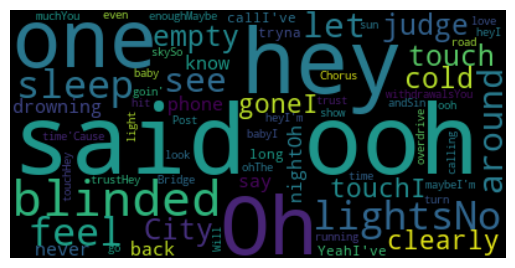

In [144]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(cleaned_lyrics)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Code for sentiment analysis

```
pip install nltk
python -m nltk.downloader vader_lexicon
```

In [167]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [172]:
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(cleaned_lyrics)
scores

{'neg': 0.037, 'neu': 0.922, 'pos': 0.041, 'compound': 0.4738}

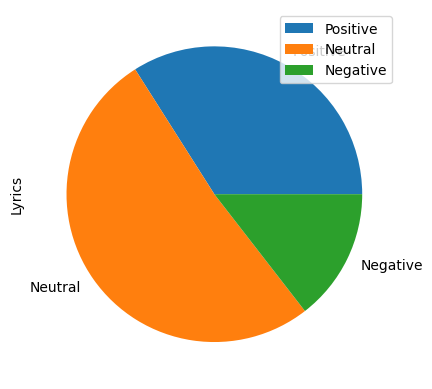

In [186]:
sid = SentimentIntensityAnalyzer()

positive_count = 0
negative_count = 0
neutral_count = 0

for lyric in songs_test['Genius_lyrics']:
    comp = sid.polarity_scores(lyric)
    comp = comp['compound']
    if comp >= 0.5:
        positive_count += 1
    elif comp > -0.5 and comp < 0.5:
        neutral_count += 1
    else:
        negative_count += 1

total = negative_count + neutral_count + positive_count
percent_negative = (negative_count/float(total))*100
percent_neutral = (neutral_count/float(total))*100
percent_positive = (positive_count/float(total))*100

sentiment_df = pd.DataFrame({'Lyrics': [percent_positive, percent_neutral, percent_negative]}, index=['Positive', 'Neutral', 'Negative'])

sentiment_df

# Based on my research plotnine has no pie chart :()              
df.plot.pie(subplots=True)
plt.show()

In [ ]:
songs_test['Genius_URL'] = songs_test.apply(lambda row: generate_song_url(row['Artist'], row['Song']), axis=1)

## Lexical Richness

In [207]:
songs_test2 = songs_test

total_words = songs_test2['Genius_lyrics'].apply(lambda x: len(x.split()))
unique_words = songs_test2['Genius_lyrics'].apply(lambda x: len(set(x.split())))
songs_test2['lexical_richness'] = unique_words/total_words*100
songs_test2 = songs_test2.sort_values('lexical_richness')

songs_test3 = songs_test2.dropna()

songs_test3

,Artist,Song,Genius_URL,Genius_lyrics,lexical_richness
121,Justin Timberlake,SexyBack,https://genius.com/justin-timberlake-sexyback-...,[Verse 1: Justin Timberlake & \nTimbaland\n]\n...,18.082192
81,Sia,Cheap Thrills,https://genius.com/sia-cheap-thrills-lyrics,"[Verse 1]\nCome on, come on, turn the radio on...",19.891008
151,Sisqo,Thong Song,https://genius.com/sisqo-thong-song-lyrics,[Intro]\nThis thing right here\nIs lettin' all...,21.153846
36,Pharrell Williams,Happy,https://genius.com/pharrell-williams-happy-lyrics,[Produced by Pharrell Williams]\n[Verse 1]\nIt...,21.516393
144,OneRepublic,Counting Stars,https://genius.com/onerepublic-counting-stars-...,"[Intro]\nLately, I've been, I've been losin' s...",22.368421
...,...,...,...,...,...
24,Taylor Swift,Anti-Hero,https://genius.com/taylor-swift-anti-hero-lyrics,[Verse 1]\nI have this thing where I get older...,49.275362
196,Terror Squad,Lean Back,https://genius.com/terror-squad-lean-back-lyrics,"[Intro: Fat Joe]\nOwwwwww! Yeah! My niggas, ah...",50.074963
25,Billie Eilish,Bad Guy,https://genius.com/billie-eilish-bad-guy-lyrics,"[Verse 1]\nWhite shirt now red, my bloody nose...",51.685393
12,Ed Sheeran,Perfect,https://genius.com/ed-sheeran-perfect-lyrics,"[Verse 1]\nI found a love for me\nOh, darlin',...",52.442997


In [210]:
from plotnine import *

/Users/ruka/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


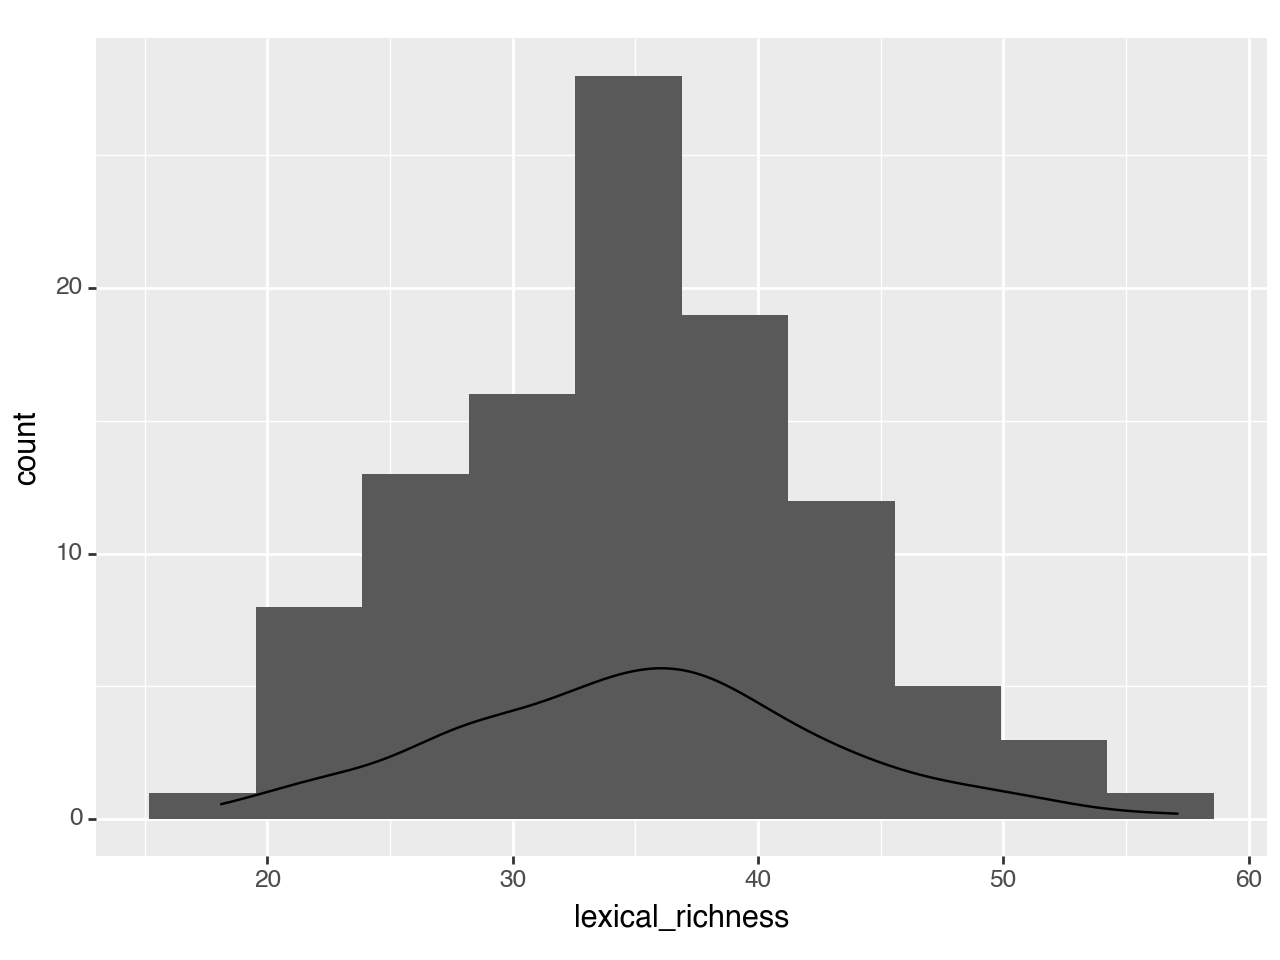

<Figure Size: (640 x 480)>

In [228]:
g = (
    ggplot(songs_test3, aes(x='lexical_richness', y=after_stat('count')))
    + geom_histogram()
    + geom_density()
)

g